In [1]:
"""
Notebook: 00_smoke_test.ipynb
Objectif: Vérifier que tous les packages sont installés et fonctionnels
Auteur: [Ton nom]
Date: 2024-11-11
"""

# Imports standards
import sys
import platform

# Imports scientifiques
import numpy as np
import pandas as pd
import scipy
import sklearn

# Imports visualisation
import matplotlib
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

# Imports Jupyter
import ipywidgets as widgets

print("=" * 60)
print("VÉRIFICATION DE L'ENVIRONNEMENT")
print("=" * 60)

# Informations système
print(f"\n🖥️  Système: {platform.system()} {platform.release()}")
print(f"🐍 Python: {sys.version.split()[0]}")
print(f"📍 Chemin Python: {sys.executable}")

print("\n" + "=" * 60)
print("VERSIONS DES PACKAGES")
print("=" * 60)

# Dictionnaire des packages à vérifier
packages = {
    "NumPy": np.__version__,
    "Pandas": pd.__version__,
    "SciPy": scipy.__version__,
    "Scikit-learn": sklearn.__version__,
    "Matplotlib": matplotlib.__version__,
    "Plotly": plotly.__version__,
    "Seaborn": sns.__version__,
    "ipywidgets": widgets.__version__
}

# Affichage formaté
for name, version in packages.items():
    print(f"✅ {name:<15} : {version}")

print("\n" + "=" * 60)
print("TOUS LES IMPORTS FONCTIONNENT !")
print("=" * 60)

VÉRIFICATION DE L'ENVIRONNEMENT

🖥️  Système: Windows 11
🐍 Python: 3.13.1
📍 Chemin Python: c:\Users\micka\Desktop\Mkl\INFO\AI\Quantum_AI\quantum_state_validator\venv\Scripts\python.exe

VERSIONS DES PACKAGES
✅ NumPy           : 2.3.4
✅ Pandas          : 2.3.3
✅ SciPy           : 1.16.3
✅ Scikit-learn    : 1.7.2
✅ Matplotlib      : 3.10.7
✅ Plotly          : 6.4.0
✅ Seaborn         : 0.13.2
✅ ipywidgets      : 8.1.8

TOUS LES IMPORTS FONCTIONNENT !


In [2]:
"""
Test: Manipulation de vecteurs complexes (états quantiques)
"""

print("Test 1: Vecteurs complexes")
print("-" * 40)

# Crée un vecteur complexe (exemple d'état quantique à 3 dimensions)
# c1, c2, c3 sont les amplitudes de probabilité
psi = np.array([
    0.5 + 0.3j,   # c1 = composante sur |0⟩
    0.4 - 0.2j,   # c2 = composante sur |1⟩
    0.6 + 0.1j    # c3 = composante sur |2⟩
], dtype=complex)

print(f"État quantique ψ:")
print(psi)

# Calcule la norme au carré (doit être ~1 pour un état normalisé)
norm_squared = np.sum(np.abs(psi)**2)
print(f"\n||ψ||² = {norm_squared:.6f}")

# Vérifie si proche de 1
if np.isclose(norm_squared, 1.0, atol=1e-6):
    print("✅ État normalisé")
else:
    print(f"⚠️  État NON normalisé (écart: {abs(1 - norm_squared):.6f})")

print("\n" + "=" * 40)

Test 1: Vecteurs complexes
----------------------------------------
État quantique ψ:
[0.5+0.3j 0.4-0.2j 0.6+0.1j]

||ψ||² = 0.910000
⚠️  État NON normalisé (écart: 0.090000)



In [3]:
"""
Test: Création d'un mini-dataset d'états quantiques
"""

print("Test 2: Création DataFrame")
print("-" * 40)

# Simule 5 états quantiques à 2 dimensions
np.random.seed(42)  # Reproductibilité

# Génère parties réelles et imaginaires aléatoires
n_states = 5
dim = 2

real_parts = np.random.randn(n_states, dim)
imag_parts = np.random.randn(n_states, dim)

# Crée le DataFrame
data = []
for i in range(n_states):
    # Calcule la norme
    state = real_parts[i] + 1j * imag_parts[i]
    norm_sq = np.sum(np.abs(state)**2)
    
    # Label: valide si norme proche de 1
    is_valid = np.isclose(norm_sq, 1.0, atol=0.1)
    
    data.append({
        'state_id': i,
        'c1_real': real_parts[i, 0],
        'c1_imag': imag_parts[i, 0],
        'c2_real': real_parts[i, 1],
        'c2_imag': imag_parts[i, 1],
        'norm_squared': norm_sq,
        'is_valid': is_valid
    })

df = pd.DataFrame(data)

print(df)
print(f"\n✅ DataFrame créé: {df.shape[0]} états, {df.shape[1]} colonnes")

print("\n" + "=" * 40)

Test 2: Création DataFrame
----------------------------------------
   state_id   c1_real   c1_imag   c2_real   c2_imag  norm_squared  is_valid
0         0  0.496714 -0.463418 -0.138264 -0.465730      0.697502     False
1         1  0.647689  0.241962  1.523030 -1.913280      6.458307     False
2         2 -0.234153 -1.724918 -0.234137 -0.562288      3.401157     False
3         3  1.579213 -1.012831  0.767435  0.314247      4.207447     False
4         4 -0.469474 -0.908024  0.542560 -1.412304      3.333887     False

✅ DataFrame créé: 5 états, 7 colonnes



Test 3: Visualisation
----------------------------------------


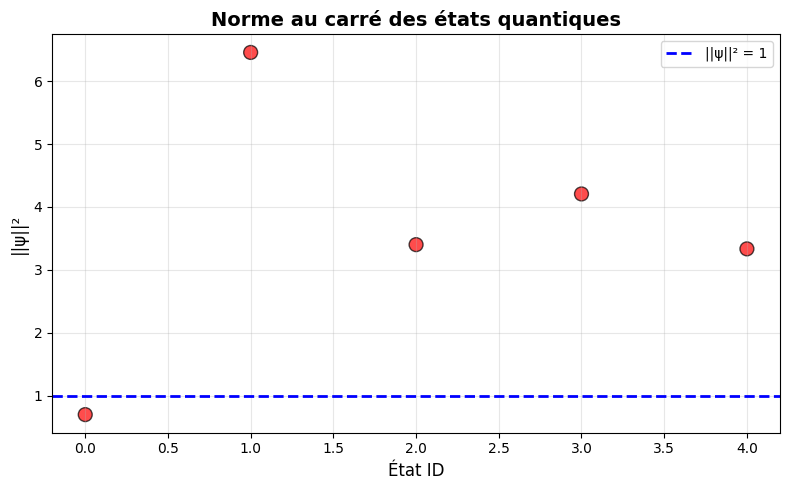

✅ Graphique affiché avec succès



In [4]:
"""
Test: Visualisation 2D simple
"""

print("Test 3: Visualisation")
print("-" * 40)

# Crée un graphique simple
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Scatter plot: norme au carré vs état valide
colors = ['red' if not valid else 'green' for valid in df['is_valid']]

ax.scatter(
    df['state_id'], 
    df['norm_squared'],
    c=colors,
    s=100,
    alpha=0.7,
    edgecolors='black'
)

# Ligne de référence à norm² = 1
ax.axhline(y=1.0, color='blue', linestyle='--', linewidth=2, label='||ψ||² = 1')

ax.set_xlabel('État ID', fontsize=12)
ax.set_ylabel('||ψ||²', fontsize=12)
ax.set_title('Norme au carré des états quantiques', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Graphique affiché avec succès")
print("\n" + "=" * 40)

In [9]:
"""
Test: Pipeline ML minimaliste
"""

print("Test 4: Machine Learning")
print("-" * 40)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Test 4: Machine Learning
----------------------------------------


In [11]:
# Prépare les données
# Features: toutes les colonnes sauf state_id et is_valid
from sklearn.dummy import DummyClassifier

X = df[['c1_real', 'c1_imag', 'c2_real', 'c2_imag', 'norm_squared']]
y = df['is_valid'].astype(int)  # 0 = invalide, 1 = valide

# Split (trop peu de données ici, juste pour le test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Vérifie la présence d'au moins 2 classes dans les données d'entraînement
if y_train.nunique() < 2:
    # Si seulement une classe est présente, on utilise un DummyClassifier pour éviter l'erreur
    model = DummyClassifier(strategy='most_frequent')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("⚠️  Pas assez de classes dans y_train. DummyClassifier utilisé (most_frequent).")
else:
    # Modèle ultra-simple
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    # Prédictions
    y_pred = model.predict(X_test)
    # Accuracy
    acc = accuracy_score(y_test, y_pred)

print(f"✅ Modèle entraîné")
print(f"📊 Accuracy: {acc:.2%}")
print(f"📈 Prédictions: {y_pred}")
print(f"🎯 Vraies valeurs: {y_test.values}")

print("\n" + "=" * 40)
print("TOUS LES TESTS PASSÉS AVEC SUCCÈS ! 🎉")
print("=" * 40)

⚠️  Pas assez de classes dans y_train. DummyClassifier utilisé (most_frequent).
✅ Modèle entraîné
📊 Accuracy: 100.00%
📈 Prédictions: [0 0]
🎯 Vraies valeurs: [0 0]

TOUS LES TESTS PASSÉS AVEC SUCCÈS ! 🎉
